In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import time

In [3]:
wine_data = pd.read_csv("QualityPrediction.csv")

In [4]:
dx = ['good','bad']

In [5]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine_data.shape

(1599, 12)

In [7]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
wine_data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [10]:
wine_data['quality'] = wine_data['quality'].apply(lambda x: 'good' if x>=5 else 'bad')

In [11]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,good
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,good
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,good
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,good
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,good
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,good


In [12]:
wine_data['quality'] = wine_data['quality'].map({'good':1,'bad':0})

In [13]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


In [14]:
x = wine_data.iloc[:, wine_data.columns != 'quality']
y = wine_data.iloc[:, wine_data.columns == 'quality']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=40)

In [16]:
y_train.shape, y_test.shape

((1279, 1), (320, 1))

In [17]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [18]:
y_train.shape, y_test.shape

((1279,), (320,))

In [19]:
rf = RandomForestClassifier(random_state = 40)
rf

RandomForestClassifier(random_state=40)

In [20]:
np.random.seed(40)
start = time.time()

param_dist = {'max_depth':range(1,10),
             'max_features':['auto','sqrt','log2',None],
             'criterion':['gini','entropy']}

cv_rf = GridSearchCV(rf,cv=8,param_grid=param_dist,n_jobs=3)

cv_rf.fit(x_train,y_train)
print('Best Parameters using Grid search: \n',cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: %0.2f'%(end-start))

Best Parameters using Grid search: 
 {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto'}
Time taken in grid search: 64.75


In [21]:
rf.set_params(bootstrap = True,
              criterion='gini',
              max_depth = 7,
              max_features = 'auto',
              warm_start= True,
              oob_score = True)

RandomForestClassifier(max_depth=7, oob_score=True, random_state=40,
                       warm_start=True)

In [22]:
min_estimators = 1
max_estimators = 100
error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    rf.set_params(n_estimators=i)
    rf.fit(x_train, y_train)

    oob_error = 1 - rf.oob_score_
    error_rate[i] = oob_error

c:\users\pavani\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\pavani\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in divide
  decision = (predictions[k] /
c:\users\pavani\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\pavani\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in divide
  decision = (predictions[k] /
c:\users\pavani\appdata\local\programs\pyt

In [23]:
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 1 to 1000 Trees)')

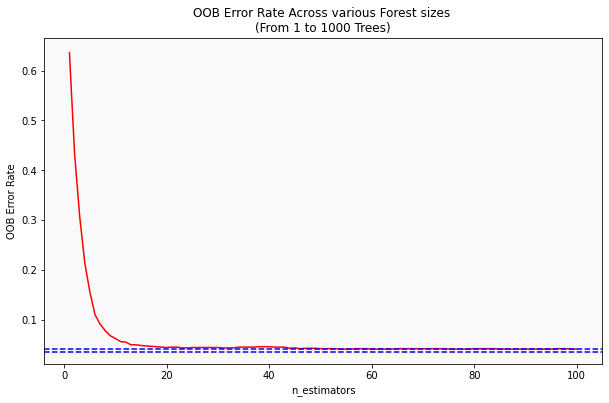

In [24]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.035,color='blue',linestyle='--')
plt.axhline(0.04,color='blue',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 1 to 1000 Trees)')

In [48]:
print('OOB Error rate for 100 trees is: %0.5f'%oob_series[100])

OOB Error rate for 100 trees is: 0.04066


In [49]:
rf.set_params(n_estimators = 100,
              bootstrap = True,
              warm_start= False,
              oob_score = False)

RandomForestClassifier(max_depth=7, random_state=40)

In [50]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, random_state=40)

In [51]:
train_predictions_rf = rf.predict(x_train)

In [52]:
train_predictions_rf

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [53]:
test_predictions_rf = rf.predict(x_test)

In [54]:
test_predictions_rf

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [55]:
test_accuracy_rf = rf.score(x_test,y_test)
print("Here our test Accuracy of model is: %0.5f"%test_accuracy_rf)
train_accuracy_rf = rf.score(x_train,y_train)
print("Here ourtrain Accuracy of model is: %0.5f"%train_accuracy_rf)

Here our test Accuracy of model is: 0.96562
Here ourtrain Accuracy of model is: 0.97342


In [56]:
test_error_rate_rf = 1-test_accuracy_rf
print("error rate of our model is: %0.5f"%test_error_rate_rf)
train_error_rate_rf = 1-train_accuracy_rf
print("error rate of our model is: %0.5f"%train_error_rate_rf)

error rate of our model is: 0.03438
error rate of our model is: 0.02658


In [57]:
def create_conf_mat(test_class_set, predictions):
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

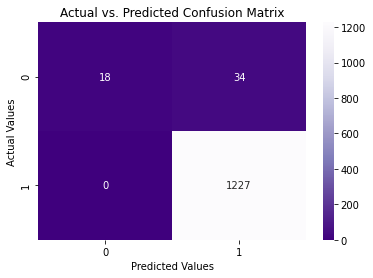

In [62]:
conf_mat = create_conf_mat(y_train, train_predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d',cmap ='Purples_r')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [63]:
con = confusion_matrix(y_train,train_predictions_rf)
con

array([[  18,   34],
       [   0, 1227]], dtype=int64)

In [64]:
def print_class_report(predictions, alg_name):
    
    print('Classification Report for %s: '%alg_name)
    print(classification_report(predictions, y_train, target_names = dx))

In [65]:
class_report = print_class_report(train_predictions_rf,'Random Forest')

Classification Report for Random Forest: 
              precision    recall  f1-score   support

        good       0.35      1.00      0.51        18
         bad       1.00      0.97      0.99      1261

    accuracy                           0.97      1279
   macro avg       0.67      0.99      0.75      1279
weighted avg       0.99      0.97      0.98      1279

